<a id='Reading data'></a>

# GooglePlayStoreApps Dataset Overview
## Reading data <a href='#Top' style="text-decoration: none;">^</a><br>

In this section, raw data will be read, overviewed and checked if cleaning is required.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [18]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [4]:
GooglePlayStoreAppsData = pd.read_csv('GooglePlayStoreApps.csv')

print('There are {} rows and {} columns in our dataset'.format(GooglePlayStoreAppsData.shape[0],GooglePlayStoreAppsData.shape[1]))

There are 10840 rows and 14 columns in our dataset


In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
GooglePlayStoreAppsData.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,CURRENT_VERSION,ANDROID_VERSION
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
GooglePlayStoreAppsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10840 non-null  int64  
 1   App              10840 non-null  object 
 2   Category         10840 non-null  object 
 3   Rating           10840 non-null  float64
 4   Reviews          10840 non-null  int64  
 5   Size_in_MB       10840 non-null  float64
 6   Installs         10840 non-null  int64  
 7   Type             10840 non-null  object 
 8   Price            10840 non-null  float64
 9   Content Rating   10840 non-null  object 
 10  Genres           10840 non-null  object 
 11  Last Updated     10840 non-null  object 
 12  CURRENT_VERSION  10840 non-null  object 
 13  ANDROID_VERSION  10840 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ MB


In this dataset, we have 10841 rows & 14 columns. In that we have 8 categorical columns and 5 numerical columns.

###### Categorical Columns: 
App, Category, Type, Content Rating, Genres, Last Updated, CURRENT_VERSION, ANDROID_VERSION.

###### Numerical Columns: 
(Index column is not included. Have to make sure the column should be renamed to slno or to kept as unnamed:0 itself)

Continuous: Rating, Size_in_MB, Price.

Discrete: Reviews, Installs.

From these, we have chosen the columns Rating(Which is a dependent variable) and Type(Which is an independent variable).

In [9]:
GooglePlayStoreAppsData.describe()

,Unnamed: 0,Rating,Reviews,Size_in_MB,Installs,Price
count,10840.000000,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,5419.533948,4.206476,4.441529e+05,20.186036,1.546434e+07,1.027368
std,3129.439605,0.480342,2.927761e+06,20.976050,8.502936e+07,15.949703
min,0.000000,1.000000,0.000000e+00,0.011000,0.000000e+00,0.000000
25%,2709.750000,4.100000,3.800000e+01,5.900000,1.000000e+03,0.000000
50%,5419.500000,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,8129.250000,4.500000,5.477550e+04,26.000000,5.000000e+06,0.000000
max,10840.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [14]:
total = GooglePlayStoreAppsData.isnull().sum().sort_values(ascending=False)
percent = (GooglePlayStoreAppsData.isnull().sum()/GooglePlayStoreAppsData.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Unnamed: 0,0,0.0
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size_in_MB,0,0.0


There are no missing data. This simplifies the analysis but it is a very unlikely scenario in a real-life where analysts spend a significant amount of time cleaning their data before the core analysis is performed

<a id='Analysis & Visualization'></a>

## Analysis & Visualization <a href='#Top' style="text-decoration: none;">^</a><br>

In this section, the dataset will be analysed and visually depicted.

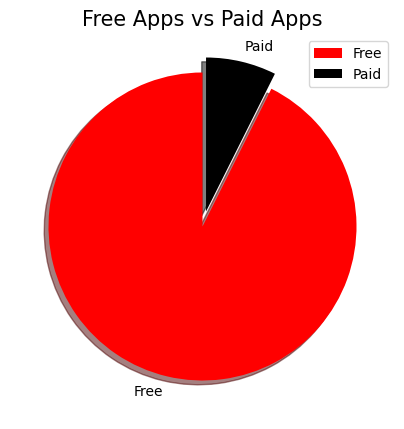

In [15]:
fig = plt.figure(figsize = (5,5))
labels = ['Free', 'Paid'] 
size = GooglePlayStoreAppsData['Type'].value_counts()
#colors = plt.cm.Wistia(np.linspace(0, 1, 5))
colors = ['r','k','y']
explode = [0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Free Apps vs Paid Apps', fontsize = 15)
plt.legend()
plt.show()

In [19]:
fig = plt.figure(figsize = (15,15))
pos = GooglePlayStoreAppsData.groupby(by='Category').size().reset_index()
pos.columns = ['Category','Count']

labels = pos['Category']
values = pos['Count']
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label', textinfo='percent', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Distribution of Apps based on Category")
fig.show()

<Figure size 1500x1500 with 0 Axes>

#### Applications with Maximum No: of reviews

In [21]:
MaxReviews = GooglePlayStoreAppsData.sort_values(by = 'Reviews',ascending = False).head(10)

<Axes: xlabel='App', ylabel='Reviews'>

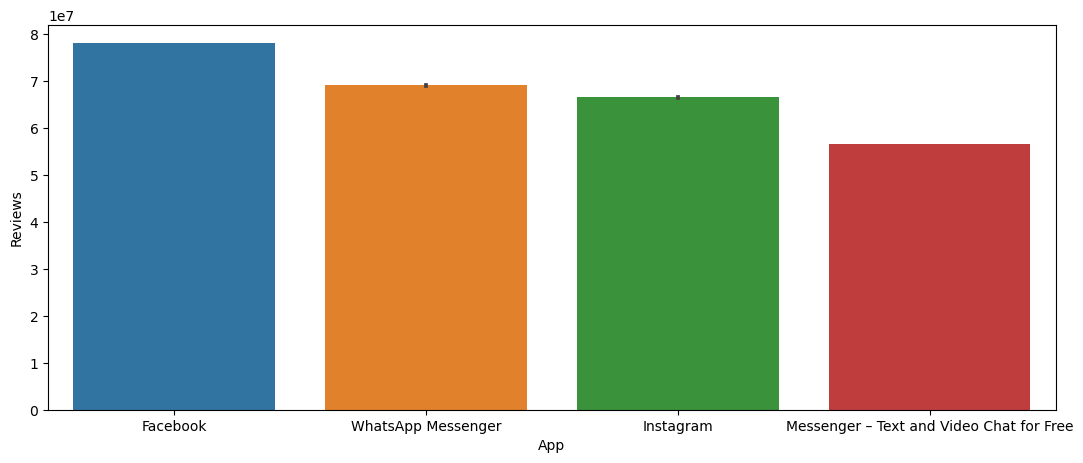

In [22]:
fig = plt.figure(figsize = (13,5))
sns.barplot(x='App',y='Reviews' , data = MaxReviews)

#### Rating vs Reviews

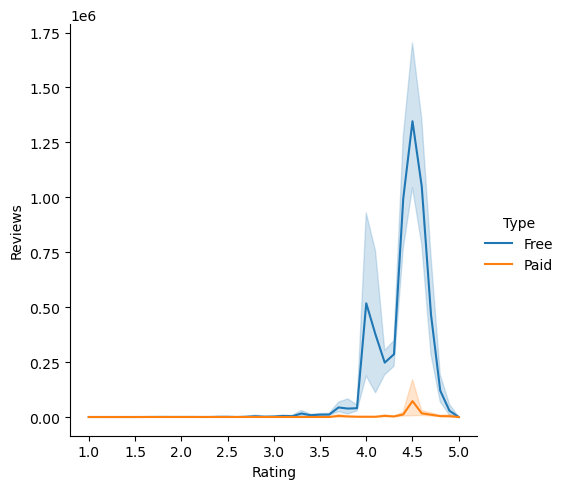

In [24]:
sns.relplot(x="Rating", y="Reviews", hue = 'Type' , kind = 'line' , data=GooglePlayStoreAppsData)

#### Rating vs Installs

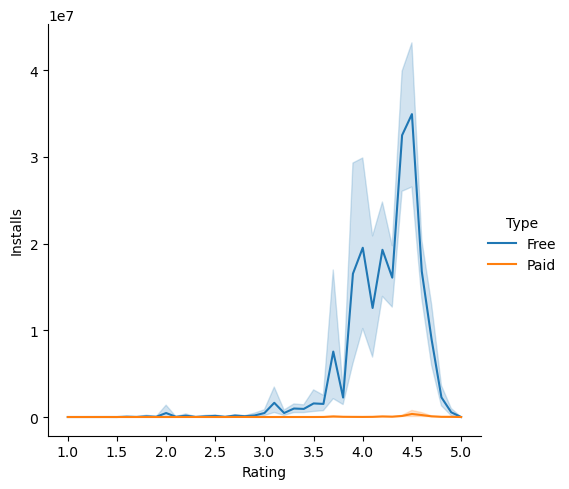

In [25]:
sns.relplot(x="Rating", y="Installs", hue = 'Type' , kind = 'line' , data=GooglePlayStoreAppsData)